# Weather Trend at Douala (Cameroon) Vs Global trend
  
**20/04/2019**

**By Furawa**

## Summary
This project is about analyzing local (Douala) and global temperature data and compare the temperature trends at Douala to overall temperature trends. After extracting, downloading and analyzing the data we found that in overall Douala's trend and the global trend are similar, the world is getting a little hotter each year for the past hundred years.  
All the steps to reach that conclusion are described below.

## Extracting the Data
The data has been Extracted from a database in Udacity using SQL queries.  
First of all, the nearest city was founded using the query below:  

```
SELECT city              # select the city column
FROM city_list           # Table where we search the city
WHERE country = 'Cameroon'; # Search in the country where the city belongs

```

This query returns just one city, *Douala*, we choose it for the next query where we will extract the average temperatures of *Douala* and the global average temperatures that matches the year in Douala.  
The query is shown below: 

```
SELECT cd.year,           # Select the year column of Douala
       cd.avg_temp AS douala_avg_temp,  # Select the average temperature of Douala
       gd.avg_temp AS global_temp       # select global temperature in the global_data
FROM city_data AS cd                    # Select year and avg_temp of Douala
JOIN global_data AS gd                  # Join the 2 tables to have the years that match
ON cd.year = gd.year                    # Join on the year of the two tables
WHERE cd.city = 'Douala';               # filter the city to be Douala
```
After extracting the data, we download it and save it as **douala_vs_global_temp.csv.**  

## Importing the data 

Now that we have downloaded the data let us import and explore it.  

In [11]:
import pandas as pd   # Import the pandas package 

douala_data = pd.read_csv("douala_vs_global_temp.csv")  # Load the file with the read_csv() method of pandas
douala_data.describe()    # Use the describe() method to see some stat

,year,douala_avg_temp,global_temp
count,158.000000,148.000000,158.000000
mean,1934.500000,24.613784,8.575823
std,45.754781,0.509949,0.458252
min,1856.000000,23.000000,7.560000
25%,1895.250000,24.275000,8.220000
50%,1934.500000,24.690000,8.555000
75%,1973.750000,24.980000,8.792500
max,2013.000000,25.700000,9.730000


Looking at the first row of the "description" we can see that there are probably missing values in the douala_avg_temp column, because both year and global_temp have 158 but douala_avg_temp has 148, let us check it and if it is the case deal with it.

In [16]:
print(douala_data["douala_avg_temp"].isnull().sum()) # find how many missing values there are 

10


In [29]:
# Replace the NaN values with the mean of the douala_avg_temp column 
douala_data.douala_avg_temp.fillna(douala_data.douala_avg_temp.mean(), inplace = True)
douala_data.describe()

,year,douala_avg_temp,global_temp
count,158.000000,158.000000,158.000000
mean,1934.500000,24.613784,8.575823
std,45.754781,0.493442,0.458252
min,1856.000000,23.000000,7.560000
25%,1895.250000,24.300000,8.220000
50%,1934.500000,24.645000,8.555000
75%,1973.750000,24.967500,8.792500
max,2013.000000,25.700000,9.730000


After dealing with the missing values we can see that the count is 158 for all three column.  
The "description" shows us that the data is between the years `1856` and `2013`.
The minimum and maximum temperature at Douala are far higher than the global temperature we have an average temperature of `24.6`degrees Celsius at Douala when the global temperature is `8.6` degrees Celsius. So in general over the years Douala is **hotter** compared to the average global temperature.  
Let us make a line chart to see the situation clearly.  

## Ploting
In order to smooth out the lines we will use a moving average (MA) instead of the yearly averages.
We calcalute the moving average over 10 years using the rolling method of the pandas package

In [68]:
# Calculate the moving average over 10 years of both temp column
douala_data["douala_MA"] = douala_data.douala_avg_temp.rolling(window = 10).mean() # MA douala_temp
douala_data["global_MA"] = douala_data.global_temp.rolling(window = 10).mean() # MA global_temp
douala_data_clean = douala_data.dropna() # Remove all the first 9 NaN values due to the calucation of MA


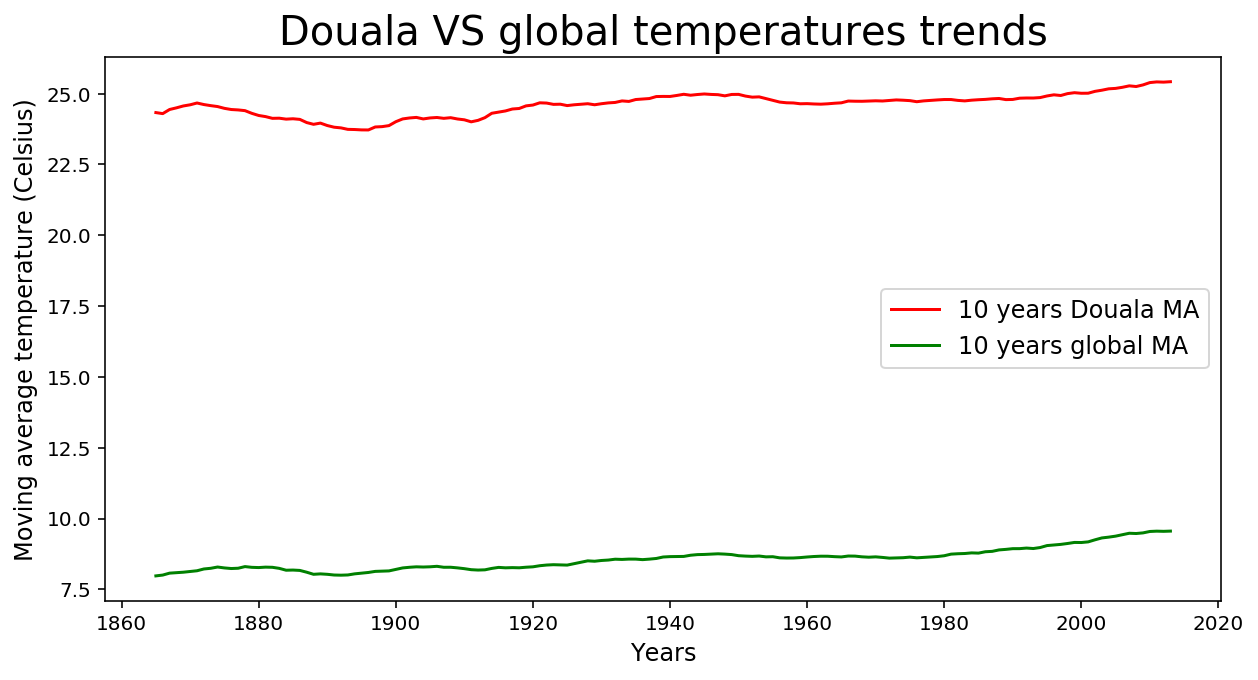

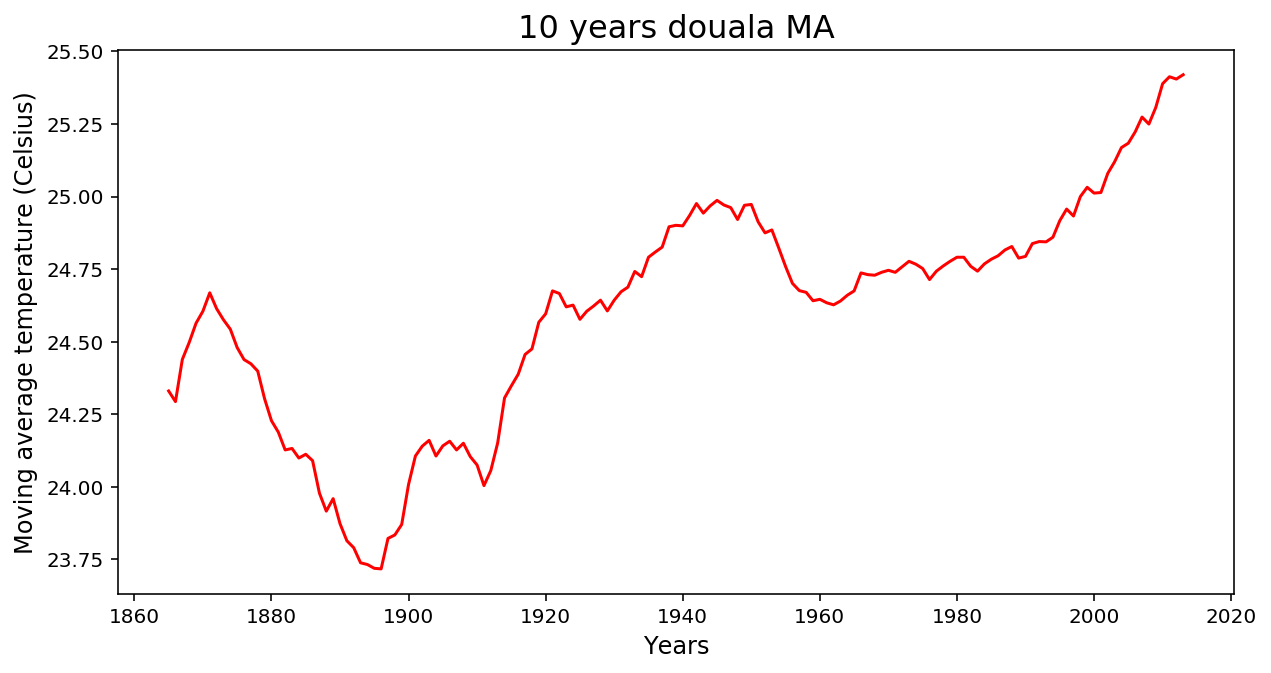

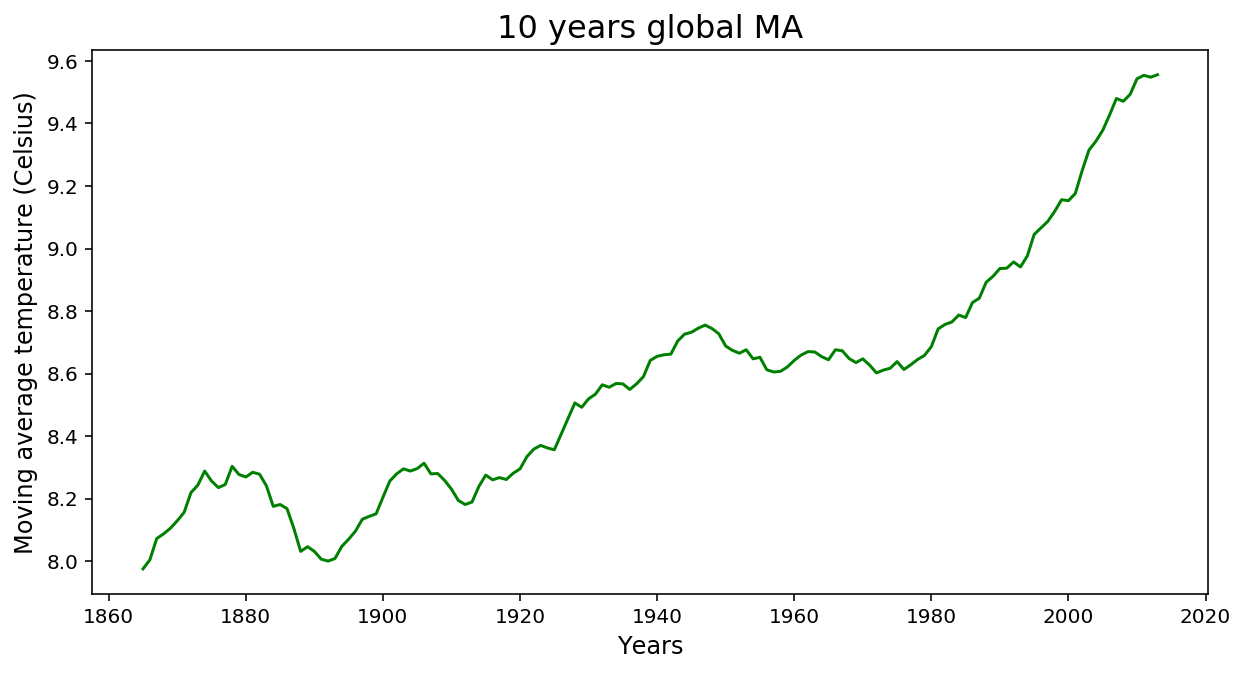

In [126]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt  # Import the package for the ploting
plt.rcParams['figure.figsize'] = [10, 5]

# Plot of both trends on the same graph
plt.plot(douala_data.year, douala_data.douala_MA, label = "10 years Douala MA",color = "red")
plt.plot(douala_data.year, douala_data.global_MA, label = "10 years global MA", color = "green")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Moving average temperature (Celsius)", fontsize = 12)
plt.title("Douala VS global temperatures trends", fontsize = 20)
plt.legend(loc = "center right", fontsize = 12)
plt.show()

# plot of Douala MA 
plt.plot(douala_data.year, douala_data.douala_MA, label = "10 years Douala MA",color = "red")
plt.title("10 years douala MA", fontsize = 16)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Moving average temperature (Celsius)", fontsize = 12)
plt.show()

# plot of the global MA
plt.plot(douala_data.year, douala_data.global_MA, label = "10 years global MA", color = "green")
plt.title("10 years global MA", fontsize = 16)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Moving average temperature (Celsius)", fontsize = 12)
plt.show()


## Observations and conclusion
- Looking at the first plot above we clearly see that on average Douala is hotter about 17°C than the global average
temperature, and the plot shows that that difference is consistent over years as the two plots almost has the same
trend.  
- The first plot shows an overview of the situation, but we cannot use it to see the real shape of the trends that is why we will use the 2 last plots. With that 2 plots we can confirm that we can confirm that they are almost identical.
We also see that the in both plots, the last hundred years the temperature is just rising, so **the world is getting hotter** 
- Here we have a problem that concerns all of us the planet is getting hotter and we have to find solutions and
act as quick as possible before it is too late.
